In [9]:
import pandas as pd



In [ ]:
import pandas as pd

def process_survey_data(file_path):
    # Define mappings and reverse items for each survey
    survey_info = {
        # "STAI_Y_S": {
        #     "page" : "P1",
        #     "questions": list(range(2, 22)),
        #     "mapping": {"전혀 그렇지 않다": 1, "조금 그렇다": 2, "보통으로 그렇다": 3, "대단히 그렇다": 4},
        #     "reverse": [1, 2, 5, 8, 10, 11, 15, 16, 19, 20],
        # },
        "STAI_Y_T": {
            "page" : "P1",
            "questions": list(range(2,22)),
            "mapping": {"전혀 그렇지 않다": 1, "가끔 그렇다.": 2, "자주 그렇다": 3, "항상 그렇다": 4},
            "reverse": [1, 3, 6, 7, 10, 13, 14, 16, 19],
        },
        "IRI": {
            "page" : "P2",
            "questions": list(range(2, 30)),
            "mapping": {"1": 0,"2": 1, "3": 2, "4": 3, "5": 4},  # Numeric strings map directly
            "reverse": [3, 4, 7, 12, 13, 14, 15, 18, 19],
        },
        "SS": {
            "page" : "P3",
            "questions": list(range(2, 42)),
            "mapping": {"A": 1, "B": 0},
            "reverse": [],
        },
        "LSRP": {
            "page" : "P4",
            "questions": list(range(2, 28)),
            "mapping": {"정말 아니다.": 1, "아니다": 2, "그렇다": 3, "정말 그렇다": 4},
            "reverse": [10, 12, 14, 15, 16, 19, 23],
        },
        "CES-D": {
            "page" : "P5",
            "questions": list(range(2, 22)),
            "mapping": {"극히 드물게(1일 이하)": 0, "때로(1-2일)": 1, "상당히(3-4일)": 2, "대부분(5-7일)": 3},
            "reverse": [4, 8, 12, 16],
        },
        "ASI": {
            "page" : "P6",
            "questions": list(range(2, 20)),
            "mapping": {"전혀 그렇지 않다": 0, "약간 그렇다": 1, "어느 정도 그렇다": 2, "많이 그렇다": 3, "매우 많이 그렇다": 4},
            "reverse": [],
        },
        "BAI": {
            "page" : "P7",
            "questions": list(range(2, 23)),
            "mapping": {"전혀 그렇지 않다": 1, "약간 그러나, 그렇게까지 신경 쓰이지 않는다": 2, "어느정도 그렇다. 때때로 불쾌하다": 3, "심각하며, 매우 신경쓰인다": 4},
            "reverse": [],
        },
        "RSES": {
            "page" : "P8",
            "questions": list(range(2, 12)),
            "mapping": {"정말 아니다": 1, "아니다": 2, "그렇다": 3, "정말 그렇다": 4},
            "reverse": [2, 5, 6, 8, 9],
        },
        "SADS": {
            "page" : "P9",
            "questions": list(range(2, 30)),
            "mapping": {"그렇다": 1, "그렇지 않다": 0},
            "reverse": [1, 3, 4, 6, 7, 9, 12, 14, 15, 17, 19, 22, 25, 27, 28],
        },
        "SCSR": {
            "page" : "P10",
            "questions": list(range(2, 23)),
            "mapping": {"전혀 나에게 해당되지 않는다": 0, "약간 나에게 해당된다": 1, "어느 정도 나 같다": 2, "매우 나 같다": 3},
            "reverse": [8, 11],
        },
        "CLQ": {
            "page" : "P11",
            "questions": list(range(2, 28)),
            "mapping": {"전혀 불안하지 않다": 0, "약간 불안하다": 1, "어느 정도 불안하다": 2, "매우 불안하다": 3, "극도로 불안하다": 4},
            "reverse": [],
        },
        "CASES-K": {
            "page" : "P12",
            "questions": list(range(2, 32)),
            "mapping": {"거의 그렇지 않다": 0, "가끔 그렇다": 1, "자주 그렇다": 2},
            "reverse": [],
        },
    }

    # Load the Excel file
    data = pd.read_excel(file_path, sheet_name='all responses')
    data = data.iloc[:, 3:]
    # Initialize a dictionary to store processed survey results
    processed_data = {}

    for survey, info in survey_info.items():
        # Extract relevant columns
        page = info["page"]
        questions = [f"{page}B{i}" for i in info["questions"]]
        survey_responses = data[questions].copy()
        

        # Apply mappings
        if info["mapping"]:
            survey_responses = survey_responses.replace(info["mapping"])
            for i in range(len(survey_responses.loc[2])):
                if type(survey_responses.loc[2][i]) != int:
                    print(type(survey_responses.loc[2][i]), i, page)
            

        # Handle reverse-scored items
        if info["reverse"]:
            reverse_questions = [f"{page}B{i+1}" for i in info["reverse"] if f"{page}B{i+1}" in questions]
            max_score = max(info["mapping"].values()) if info["mapping"] else survey_responses.max().max()
    #         survey_responses[reverse_questions] = max_score + 1 - survey_responses[reverse_questions]

    #     # Calculate total score
        processed_data[survey] = survey_responses.loc[2:].sum(axis=1)
    

        # Special cases
        if survey == "CES-D":
            processed_data["CES-D_Above_25"] = processed_data[survey] > 25
        elif survey == "CLQ":
            processed_data["CLQ_Suffocation"] = survey_responses.loc[2:].iloc[:, :14].sum(axis=1)
            processed_data["CLQ_Restriction"] = survey_responses.loc[2:].iloc[:, 14:26].sum(axis=1)

    # Combine results into a DataFrame
    final_results = pd.DataFrame(processed_data)
    final_results = final_results

    ## Save to an Excel file
    # output_path = file_path.replace('.xlsx', '_processed.xlsx')
    # final_results.to_excel(output_path, index=False)
    

    return final_results

In [26]:
# Load the uploaded CSV file to inspect its structure
# file_path = './pilot2/raw/sangsu/survey_main.xlsx'
file_path = './data/Survey/Main Survey.xlsx'

survey_data = process_survey_data(file_path)

In [27]:
survey_data

,STAI_Y_T,IRI,SS,LSRP,CES-D,CES-D_Above_25,ASI,BAI,RSES,SADS,SCSR,CLQ,CLQ_Sum_1_14,CLQ_Sum_15_26,CASES-K
2,43.0,104.0,19.0,61.0,18.0,False,20.0,29.0,26.0,14.0,44.0,34.0,12.0,22.0,55.0
3,49.0,96.0,14.0,52.0,17.0,False,10.0,24.0,24.0,16.0,37.0,26.0,8.0,18.0,54.0
4,51.0,89.0,16.0,66.0,20.0,False,10.0,30.0,28.0,15.0,40.0,22.0,10.0,12.0,46.0
5,39.0,80.0,23.0,62.0,6.0,False,28.0,29.0,27.0,14.0,38.0,44.0,30.0,14.0,34.0
6,46.0,91.0,21.0,72.0,5.0,False,31.0,33.0,27.0,18.0,37.0,53.0,21.0,32.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,46.0,82.0,16.0,71.0,20.0,False,6.0,23.0,27.0,24.0,31.0,9.0,7.0,2.0,30.0
106,47.0,91.0,20.0,63.0,14.0,False,20.0,34.0,26.0,12.0,44.0,44.0,17.0,27.0,57.0
107,44.0,87.0,20.0,49.0,14.0,False,7.0,22.0,28.0,14.0,36.0,23.0,3.0,20.0,39.0
108,46.0,75.0,22.0,63.0,15.0,False,9.0,24.0,26.0,14.0,31.0,15.0,4.0,11.0,48.0


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import math

def plot_survey_histograms(df):
    # 불리언 제외한 수치형 컬럼만 선택
    numeric_cols = df.select_dtypes(include='number').columns.tolist()

    # anxiety 기준 구간 설정: (x좌표, 색, 라벨)
    thresholds = {
        'STAI_Y_T': [(20, '#a6cee3', 'Low'), (38, '#1f78b4', 'Moderate'), (45, '#08306b', 'High')],
        'CES-D': [(25, 'red', 'High')],
        'ASI': [(18, '#a1d99b', 'Low'), (36, '#41ab5d', 'Moderate'), (54, '#005a32', 'High')],
        'SADS': [(2, '#c6dbef', 'Average'), (12, '#08306b', 'High')],
        'GAD7': [(5, '#c6dbef', 'Mild'), (10, '#6baed6', 'Moderate'), (15, '#2171b5', 'Severe')],
    }

    n_cols = 4
    n_rows = math.ceil(len(numeric_cols) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        ax = axes[i]
        ax.hist(df[col].dropna(), bins=10, edgecolor='black', color='lightgray')
        ax.set_title(f'{col}', fontsize=12)
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')

        # 세로선 + 라벨 텍스트
        if col in thresholds:
            for x, color, label in thresholds[col]:
                ax.axvline(x=x, color=color, linestyle='--', linewidth=2)
                ax.text(x, ax.get_ylim()[1]*0.95, label, rotation=90, color=color,
                        fontsize=10, ha='right', va='top', backgroundcolor='white')

    # 남은 subplot 제거
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


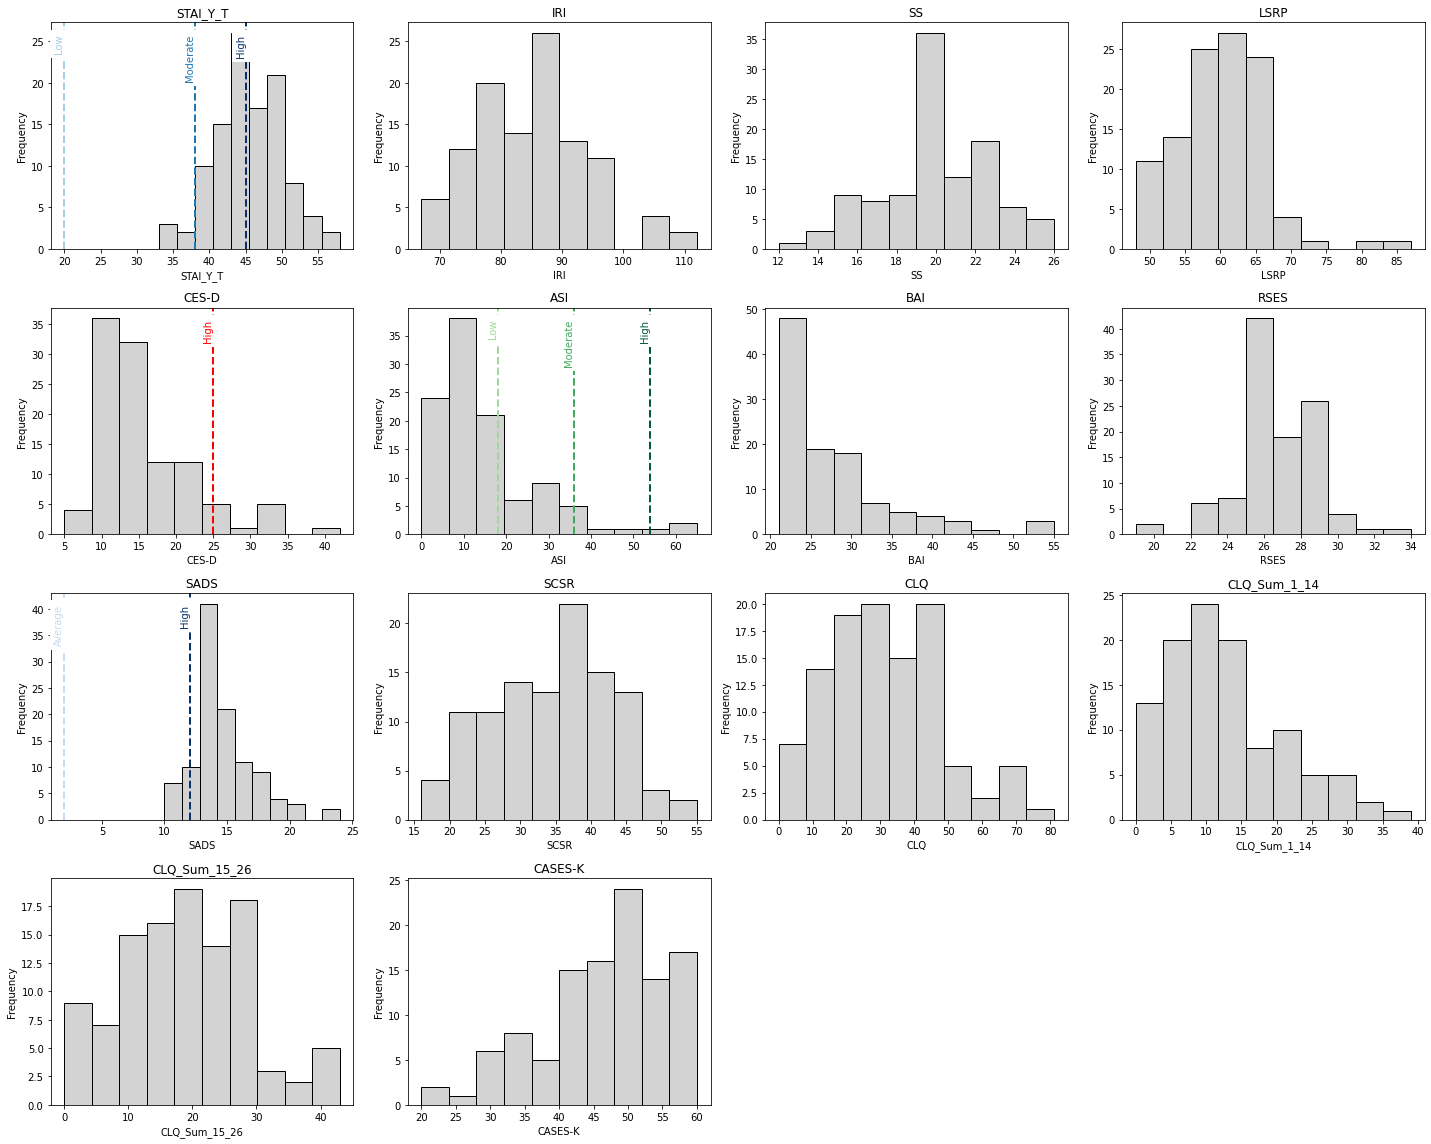

In [33]:
plot_survey_histograms(survey_data)

In [9]:
survey_data

NameError: name 'survey_data' is not defined

In [ ]:
# Define survey details
surveys = {
    "STAI_Y_S": 20, 
    "STAI_Y_T": 20,
    "IRI": 28,
    "SS": 40,
    "LSRP": 26,
    "CES-D": 20,
    "ASI":18 ,
    "BAI": 21,
    "RSES": 10,
    "SADS": 28,
    "SCSR": 21,
    "CLQ": 26,
    "CASES-K": 30 
}

# Generate sequential column names for surveys
new_column_names = ["timestamp"]
for survey, count in surveys.items():
    for i in range(1, count + 1):
        new_column_names.append(f"{survey}_{i}")

# Add personal information columns
new_column_names += ["name", "age", "gender"]

# Rename columns in the dataset
if len(new_column_names) == survey_data.shape[1]:
    survey_data.columns = new_column_names
else:
    print("Column count mismatch. Please check the structure.")


In [4]:
survey_data

,timestamp,CES-D_1,CES-D_2,CES-D_3,CES-D_4,CES-D_5,CES-D_6,CES-D_7,CES-D_8,CES-D_9,...,Big5_Part5_14,Big5_Part5_15,Big5_Part5_16,Big5_Part5_17,Big5_Part5_18,Big5_Part5_19,Big5_Part5_20,name,age,gender
0,2024/12/03 7:41:48 오후 GMT+9,극히 드물다 (일주일 동안 1일 이하),극히 드물다 (일주일 동안 1일 이하),극히 드물다 (일주일 동안 1일 이하),대부분 그랬다 (일주일 동안 5일 이상),극히 드물다 (일주일 동안 1일 이하),극히 드물다 (일주일 동안 1일 이하),극히 드물다 (일주일 동안 1일 이하),대부분 그랬다 (일주일 동안 5일 이상),극히 드물다 (일주일 동안 1일 이하),...,매우 그렇다,전혀 아니다,별로 아니다,별로 아니다,중간이다,약간 그렇다,중간이다,조희승,31,남
1,2024. 12. 5 오후 5:42:26,극히 드물다 (일주일 동안 1일 이하),극히 드물다 (일주일 동안 1일 이하),극히 드물다 (일주일 동안 1일 이하),종종 있었다 (일주일 동안 3-4일),가끔 있었다 (일주일 동안 1-2일),극히 드물다 (일주일 동안 1일 이하),극히 드물다 (일주일 동안 1일 이하),가끔 있었다 (일주일 동안 1-2일),극히 드물다 (일주일 동안 1일 이하),...,중간이다,약간 그렇다,중간이다,전혀 아니다,별로 아니다,별로 아니다,별로 아니다,sangsu,28,남


In [5]:
cesd_encoding = {
    "극히 드물다 (일주일 동안 1일 이하)": 0,
    "가끔 있었다 (일주일 동안 1-2일)": 1,
    "종종 있었다 (일주일 동안 3-4일)": 2,
    "대부분 그랬다 (일주일 동안 5일 이상)": 3,
}
big5_encoding = {
    "전혀 아니다": 1,
    "별로 아니다": 2,
    "중간이다": 3,
    "약간 그렇다": 4,
    "매우 그렇다": 5,
}

# Loop through each column and apply the encoding
for column in survey_data.columns:
    # Check which survey the column belongs to
    if column.startswith("CES-D"):
        # Apply CES-D encoding
        survey_data[column] = survey_data[column].map(cesd_encoding)
    elif column.startswith("Big5"):
        # Apply Big5 encoding
        survey_data[column] = survey_data[column].map(big5_encoding)
    elif column.startswith("IRI") or column.startswith("IDAQ") or column.startswith("ERQ"):
        # These surveys don't require encoding; keep as-is
        continue

In [6]:
survey_data

,timestamp,CES-D_1,CES-D_2,CES-D_3,CES-D_4,CES-D_5,CES-D_6,CES-D_7,CES-D_8,CES-D_9,...,Big5_Part5_14,Big5_Part5_15,Big5_Part5_16,Big5_Part5_17,Big5_Part5_18,Big5_Part5_19,Big5_Part5_20,name,age,gender
0,2024/12/03 7:41:48 오후 GMT+9,0,0,0,3,0,0,0,3,0,...,5,1,2,2,3,4,3,조희승,31,남
1,2024. 12. 5 오후 5:42:26,0,0,0,2,1,0,0,1,0,...,3,4,3,1,2,2,2,sangsu,28,남


In [7]:
reverse_items = {
    "CES-D": [4, 8, 12, 16],  # Items to reverse
    "IRI": [3, 4, 7, 12, 13, 14, 15, 18, 19],
    "Big5_Part1": [6, 7, 8, 9, 10, 16, 17, 18, 19, 20],
    "Big5_Part2": [7, 8, 9, 10, 19, 20],
    "Big5_Part3": [7, 8, 9, 10, 16, 17, 18, 19, 20],
    "Big5_Part4": [3, 4, 5, 6, 7, 8, 9, 10, 14, 15, 16, 17, 18, 19, 20],
    "Big5_Part5": [8, 9, 10, 17, 18, 19, 20],
}

# Define maximum scores for each survey
max_scores = {
    "CES-D": 3,
    "IRI": 5,
    "Big5": 5,
}

# Apply reverse scoring
for column in survey_data.columns:
    if column.startswith("CES-D"):
        item_number = int(column.split("_")[1])
        if item_number in reverse_items["CES-D"]:
            survey_data[column] = max_scores["CES-D"] - survey_data[column]
    elif column.startswith("IRI"):
        item_number = int(column.split("_")[1])
        if item_number in reverse_items["IRI"]:
            survey_data[column] = max_scores["IRI"] - survey_data[column]
    elif column.startswith("Big5"):
        # Extract part and item number for Big5
        part_name, item_number = column.split("_")[1], int(column.split("_")[2])
        part_key = f"Big5_{part_name}"  # e.g., "Big5_Part1"
        if part_key in reverse_items and item_number in reverse_items[part_key]:
            survey_data[column] = max_scores["Big5"] - survey_data[column]

In [8]:
survey_data

,timestamp,CES-D_1,CES-D_2,CES-D_3,CES-D_4,CES-D_5,CES-D_6,CES-D_7,CES-D_8,CES-D_9,...,Big5_Part5_14,Big5_Part5_15,Big5_Part5_16,Big5_Part5_17,Big5_Part5_18,Big5_Part5_19,Big5_Part5_20,name,age,gender
0,2024/12/03 7:41:48 오후 GMT+9,0,0,0,0,0,0,0,0,0,...,5,1,2,3,2,1,2,조희승,31,남
1,2024. 12. 5 오후 5:42:26,0,0,0,1,1,0,0,2,0,...,3,4,3,4,3,3,3,sangsu,28,남


In [9]:
# Initialize a dictionary to store results
survey_results = pd.DataFrame()

# Add personal information to the results
survey_results["name"] = survey_data["name"]
survey_results["age"] = survey_data["age"]
survey_results["gender"] = survey_data["gender"]

# Calculate total sums for CES-D, IRI, IDAQ
survey_results["CES-D_Total"] = survey_data.filter(like="CES-D").sum(axis=1)
survey_results["IRI_Total"] = survey_data.filter(like="IRI").sum(axis=1)
survey_results["IDAQ_Total"] = survey_data.filter(like="IDAQ").sum(axis=1)

# Calculate total and subset sums for ERQ
survey_results["ERQ_Total"] = survey_data.filter(like="ERQ").sum(axis=1)
erq_subset1 = [1, 3, 5, 7, 8, 10]  # Items for subset 1
erq_subset2 = [2, 4, 6, 9]         # Items for subset 2
survey_results["ERQ_Cognitive Reappraisal"] = survey_data[[f"ERQ_{i}" for i in erq_subset1]].sum(axis=1)
survey_results["ERQ_Expressive Suppression"] = survey_data[[f"ERQ_{i}" for i in erq_subset2]].sum(axis=1)

# Calculate Big5 sums by part
for part in range(1, 6):  # Big5 has 5 parts
    part_columns = survey_data.filter(like=f"Big5_Part{part}").columns
    survey_results[f"Big5_Part{part}_Sum"] = survey_data[part_columns].sum(axis=1)
# Define the new names for the Big5 parts
big5_rename_dict = {
    "Big5_Part1": "Big5_Extraversion",
    "Big5_Part2": "Big5_Agreeableness",
    "Big5_Part3": "Big5_Conscientiousness",
    "Big5_Part4": "Big5_Emotional Stability",
    "Big5_Part5": "Big5_Intellect"
}

# Rename the columns in survey_results
survey_results.rename(columns={f"Big5_Part{i}_Sum": big5_rename_dict[f"Big5_Part{i}"] for i in range(1, 6)}, inplace=True)

# Display the calculated results
survey_results.head()

,name,age,gender,CES-D_Total,IRI_Total,IDAQ_Total,ERQ_Total,ERQ_Cognitive Reappraisal,ERQ_Expressive Suppression,Big5_Extraversion,Big5_Agreeableness,Big5_Conscientiousness,Big5_Emotional Stability,Big5_Intellect
0,조희승,31,남,2,90,141,43,36,7,71,65,47,61,59
1,sangsu,28,남,12,107,149,23,15,8,41,69,60,44,72


,name,Survey,Value
0,조희승,age,31
1,sangsu,age,28
2,조희승,gender,남
3,sangsu,gender,남
4,조희승,CES-D_Total,2
5,sangsu,CES-D_Total,12
6,조희승,IRI_Total,90
7,sangsu,IRI_Total,107
8,조희승,IDAQ_Total,141
9,sangsu,IDAQ_Total,149


c:\Users\Jiyoon\anaconda3\envs\torch\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\Jiyoon\anaconda3\envs\torch\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 55148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\Jiyoon\anaconda3\envs\torch\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49849 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\Jiyoon\anaconda3\envs\torch\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\Users\Jiyoon\anaconda3\envs\torch\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 55148 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\Users\Jiyoon\anaconda3\envs\torch\lib\site-packages\matplotlib\bac

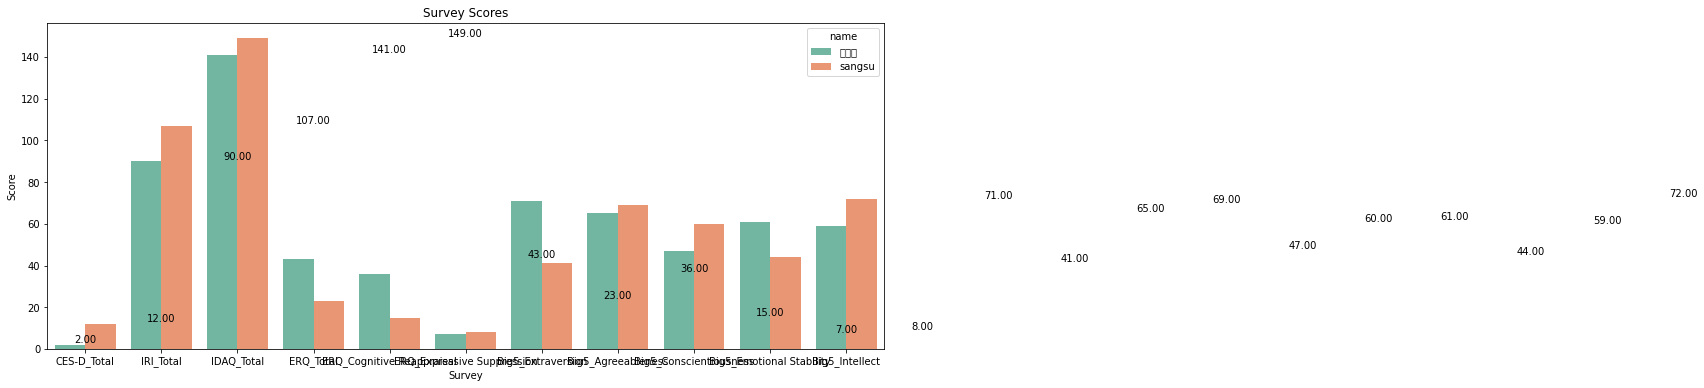

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("Set2")
palette = sns.color_palette("Set2")
# Example for CES-D and Big5 distributions
surveys = ["name","CES-D_Total", "IRI_Total", "IDAQ_Total", "ERQ_Total", "ERQ_Cognitive Reappraisal", "ERQ_Expressive Suppression",
     "Big5_Extraversion", "Big5_Agreeableness", "Big5_Conscientiousness", "Big5_Emotional Stability", "Big5_Intellect"]
total_scores = long_format = pd.melt(
    survey_results[surveys],
    id_vars=["name"],  # Columns to keep (will not be melted)
    var_name="Survey",        # Name of the new column for the survey labels
    value_name="Value"        # Name of the new column for the survey values
)
total_scores
# total_scores = survey_results[["Big5_Extraversion", "Big5_Agreeableness", "Big5_Conscientiousness", "Big5_Emotional Stability", "Big5_Intellect"]].mean()
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=total_scores, x="Survey", y="Value", hue="name")
# max_y_value = 100
# Add sum values on top of the bars
for i, value in enumerate(total_scores["Value"]):
    ax.text(i, value + 0.1, f'{value:.2f}', ha='center', va='bottom', fontsize=10)
plt.title("Survey Scores")
plt.ylabel("Score")
plt.xticks(rotation=0)
threshold_value = 25  # Example threshold value for CES-D
if "CES-D_Total" in total_scores.index:
    cesd_index = total_scores.index.get_loc("CES-D_Total")  # Get the index of CES-D_Total
    # Add horizontal line at the threshold value, only above CES-D_Total
    ax.hlines(y=threshold_value, xmin=cesd_index - 0.4, xmax=cesd_index + 0.4, color='red', linestyle='--', label=f'Threshold: {threshold_value}')

# plt.ylim(0, max_y_value)
plt.show()

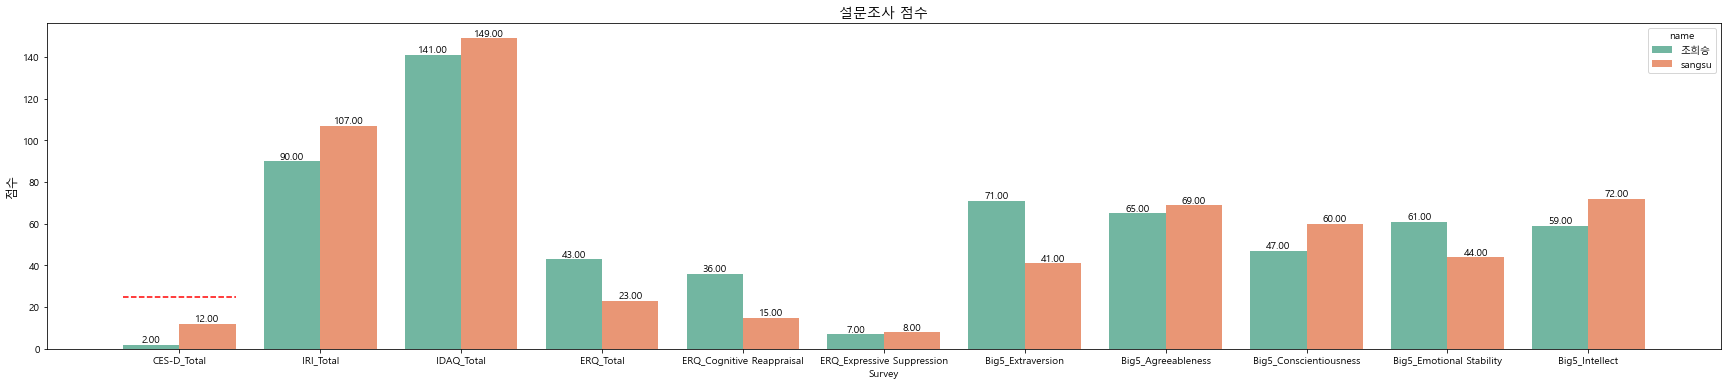

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import pandas as pd

# Set Korean-compatible font (adjust font name as per your system)
rc('font', family='Malgun Gothic')  # For Windows: Malgun Gothic
# rc('font', family='AppleGothic')  # For Mac: AppleGothic
# rc('font', family='NanumGothic')  # For Linux: NanumGothic
plt.rcParams['axes.unicode_minus'] = False

# Example data
surveys = [
    "name", "CES-D_Total", "IRI_Total", "IDAQ_Total", "ERQ_Total",
    "ERQ_Cognitive Reappraisal", "ERQ_Expressive Suppression",
    "Big5_Extraversion", "Big5_Agreeableness", "Big5_Conscientiousness",
    "Big5_Emotional Stability", "Big5_Intellect"
]
total_scores = pd.melt(
    survey_results[surveys],
    id_vars=["name"],  # Columns to keep (will not be melted)
    var_name="Survey",        # Name of the new column for the survey labels
    value_name="Value"        # Name of the new column for the survey values
)

# Plot
plt.figure(figsize=(30, 6))
sns.set_palette("Set2")
ax = sns.barplot(data=total_scores, x="Survey", y="Value", hue="name")

# Add text on bars
for container in ax.containers:
    for bar in container:
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_height()
        if y > 0:
            ax.text(x, y + 0.1, f'{y:.2f}', ha='center', va='bottom', fontsize=10)

# Add a red horizontal line only for CES-D_Total bars
threshold_value = 25  # Example threshold value
cesd_bars = total_scores[total_scores["Survey"] == "CES-D_Total"]["name"].unique()  # Unique participants in CES-D

# Find CES-D bars x positions
for patch, (survey, participant) in zip(ax.patches, total_scores[["Survey", "name"]].values):
    if survey == "CES-D_Total":  # Only for CES-D bars
        if participant == '조희승':
            bar_x_center = patch.get_x() + patch.get_width() / 2
            bar_width = patch.get_width()
            ax.hlines(y=threshold_value,
                    xmin=bar_x_center - bar_width / 2,
                    xmax=bar_x_center + bar_width * 1.5,
                    color='red', linestyle='--')

# Title and labels
plt.title("설문조사 점수", fontsize=14)
plt.ylabel("점수", fontsize=12)
plt.xticks(rotation=0)

plt.show()

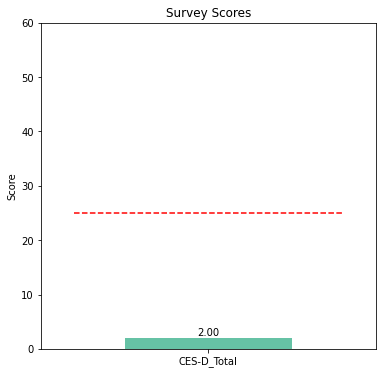

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("Set2")
palette = sns.color_palette("Set2")
current = "CES-D_Total"
# Example for CES-D and Big5 distributions
total_scores = survey_results[[current]].mean()
plt.figure(figsize=(6, 6))
ax = total_scores.plot(kind='bar', color=palette[0])
max_y_value = 60
# Add sum values on top of the bars
for i, value in enumerate(total_scores):
    ax.text(i, value + 0.1, f'{value:.2f}', ha='center', va='bottom', fontsize=10)
plt.title("Survey Scores")
plt.ylabel("Score")
plt.xticks(rotation=0)
threshold_value = 25  # Example threshold value for CES-D
if current in total_scores.index:
    cesd_index = total_scores.index.get_loc(current)  # Get the index of CES-D_Total
    ax.hlines(y=threshold_value, xmin=cesd_index - 0.4, xmax=cesd_index + 0.4, color='red', linestyle='--', label=f'Threshold: {threshold_value}')
plt.ylim(0, max_y_value)
plt.show()

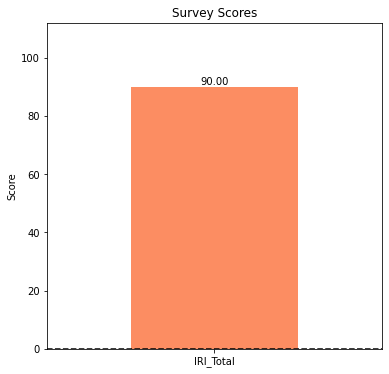

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("Set2")
palette = sns.color_palette("Set2")
current = "IRI_Total"
# Example for CES-D and Big5 distributions
total_scores = survey_results[[current]].mean()
plt.figure(figsize=(6, 6))
ax = total_scores.plot(kind='bar', color=palette[1])
max_y_value = 112
# Add sum values on top of the bars
for i, value in enumerate(total_scores):
    ax.text(i, value + 0.1, f'{value:.2f}', ha='center', va='bottom', fontsize=10)
plt.title("Survey Scores")
plt.ylabel("Score")
plt.xticks(rotation=0)
threshold_value =0 # Example threshold value for CES-D
plt.axhline(y=threshold_value, color='black', linestyle='--', label=f'Threshold: {threshold_value}')
plt.ylim(0, max_y_value)
plt.show()

In [60]:
survey_results

,name,age,gender,CES-D_Total,IRI_Total,IDAQ_Total,ERQ_Total,ERQ_Cognitive Reappraisal,ERQ_Expressive Suppression,Big5_Extraversion,Big5_Agreeableness,Big5_Conscientiousness,Big5_Emotional Stability,Big5_Intellect
0,조희승,31,남,14,81,141,43,36,7,71,65,47,61,59


TypeError: unhashable type: 'list'

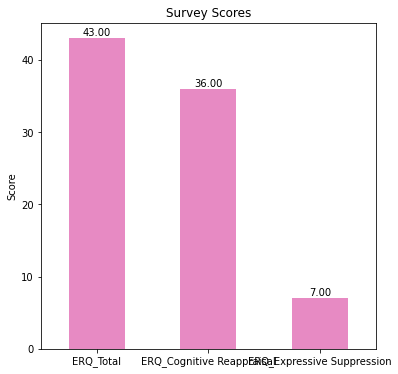

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("Set2")
palette = sns.color_palette("Set2")
## "IDAQ_Total", "ERQ_Total", "ERQ_Cognitive Reappraisal", "ERQ_Expressive Suppression",
##   "Big5_Extraversion", "Big5_Agreeableness", "Big5_Conscientiousness", "Big5_Emotional Stability", "Big5_Intellect"

current = ["ERQ_Total", "ERQ_Cognitive Reappraisal", "ERQ_Expressive Suppression"]
# Example for CES-D and Big5 distributions
total_scores = survey_results[current].mean()
plt.figure(figsize=(6, 6))
ax = total_scores.plot(kind='bar', color=palette[3])
max_y_value = 70
# Add sum values on top of the bars
for i, value in enumerate(total_scores):
    ax.text(i, value + 0.1, f'{value:.2f}', ha='center', va='bottom', fontsize=10)
plt.title("Survey Scores")
plt.ylabel("Score")
plt.xticks(rotation=0)
threshold_value = 10  # Example threshold value for CES-D
if current in total_scores.index:
    cesd_index = total_scores.index.get_loc(current)  # Get the index of CES-D_Total
    ax.hlines(y=threshold_value, xmin=cesd_index - 0.4, xmax=cesd_index + 0.4, color='black', linestyle='--', label=f'Threshold: {threshold_value}')
plt.ylim(0, max_y_value)
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("Set2")
palette = sns.color_palette("Set2")
current = "IRI_Total"
# Example for CES-D and Big5 distributions
total_scores = survey_results[[current]].mean()
plt.figure(figsize=(6, 6))
ax = total_scores.plot(kind='bar', color=palette[1])
max_y_value = 112
# Add sum values on top of the bars
for i, value in enumerate(total_scores):
    ax.text(i, value + 0.1, f'{value:.2f}', ha='center', va='bottom', fontsize=10)
plt.title("Survey Scores")
plt.ylabel("Score")
plt.xticks(rotation=0)
threshold_value = 0  # Example threshold value for CES-D
if current in total_scores.index:
    cesd_index = total_scores.index.get_loc(current)  # Get the index of CES-D_Total
    ax.hlines(y=threshold_value, xmin=cesd_index - 0.4, xmax=cesd_index + 0.4, color='black', linestyle='--', label=f'Threshold: {threshold_value}')
plt.ylim(0, max_y_value)
plt.show()